In [ ]:
!pip install -U --quiet kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00


In [ ]:
!pip install --quiet pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from collections import defaultdict

In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1jOHmTGNRcpxkMMXeJCIlxEALf4ipCsyO',
                                    dest_path='./survey_data.zip',
                                    unzip=False)

In [ ]:
!ls

In [ ]:
!unzip survey_data.zip

In [ ]:
data_raw = pd.read_excel('Survey_data_860_v3.xlsx')

In [ ]:
# To use only Madrid Data
# print(len(data_raw))
# data_raw = data_raw[data_raw.iloc[:,4].str.contains("ESM")]
# print(len(data_raw))

In [ ]:
data_raw

In [ ]:
data_raw.columns

## CB level

In [ ]:
CB_level = pd.DataFrame()
CB_level['Cyberbullying'] = data_raw['Piensa si, en el último año, recuerdas alguna situación que implicara recibir insultos repetidamente a través de redes sociales.'].str.contains("Me ha pasado a mí")*1
CB_level['Cyberbullying'] = CB_level['Cyberbullying']*1 + data_raw['¿Y con la publicación de un vídeo, foto o meme vergonzoso de ti/de otra persona, sin permiso?'].str.contains("Me ha pasado a mí")*1
CB_level['Cyberbullying'] = CB_level['Cyberbullying']*1 + data_raw['¿Alguien trató de aislarte a ti o a otra persona del grupo de amigos/as o de clase?'].str.contains("Me ha pasado a mí")*1
CB_level.value_counts(dropna=False)

In [ ]:
# Threshold = 2
CB = np.where(CB_level['Cyberbullying'] >= 2, 1, 0)
np.unique(CB, return_counts=True)

## Data for basic BN

In [ ]:
# Drop columns that we are not gonna use
data_1 = data_raw[['Edad', 'Género', 'Orientación sexual', 'País de nacimiento de la madre', 'País de nacimiento del padre', 'Hours Internet Week', 'Ciber-acoso / ciber-bullying', 'En casa han hablado conmigo sobre estos peligros']]

# Add CB_level: number of CB related situations
data_1.insert(len(data_1.columns), 'CB_level', CB_level.values)

# Add CB: 1 if you have a CB_level >= 2
data_1.insert(len(data_1.columns), 'CB', CB)

# Rename columns
data_1.rename(columns = {'Edad':'Age',
                         'Género':'Gender',
                         'Orientación sexual':'Sex_Orient',
                         'Hours Internet Week':'Hours_Internet',
                         'En casa han hablado conmigo sobre estos peligros':'Family_Comm',
                         'Ciber-acoso / ciber-bullying': 'Awareness_CB'},
                          inplace = True)

# Delete participants that indicate "prefer not to say"
data_1 = data_1[~data_1['Gender'].str.contains('Prefiero no decirlo', na=False)]
data_1 = data_1[~data_1['Sex_Orient'].str.contains('Prefiero no decirlo', na=False)]
data_1 = data_1[~data_1['Hours_Internet'].str.contains('No sabe / No contesta', na=False)]
data_1 = data_1[~data_1['Awareness_CB'].str.contains('NS/NC', na=False)]
data_1 = data_1[~data_1['Family_Comm'].str.contains('NS/NC', na=False)]

data_1

### Age

In [ ]:
data_1['Age'].value_counts(dropna=False)

In [ ]:
data_1['Age'].mean()

In [ ]:
data_1['Age'].std()

In [ ]:
data_1.replace({'Age': {12: 0,
                        13: 0,
                        14: 1,
                        15: 2,
                        16: 3,
                        17: 4}}
               , inplace=True)

In [ ]:
data_1['Age'].value_counts()

### Gender

In [ ]:
data_1['Gender'].value_counts(dropna=False)

In [ ]:
data_1 = data_1[data_1['Gender'].notna()]

In [ ]:
data_1.replace({'Gender': {'Hombre': 0,
                           'Mujer': 1,
                           'No binario': 2}}
               , inplace=True)

In [ ]:
data_1['Gender'].value_counts()

In [ ]:
data_1['Gender'].value_counts(normalize=True)

### Sex_Orient

In [ ]:
data_1['Sex_Orient'].value_counts(dropna=False)

In [ ]:
data_1.replace({'Sex_Orient': {'Heterosexual': 0,
                               'Bisexual': 1, 'No lo tengo claro': 1, 'Homosexual': 1,  'Otra': 1}}
               , inplace=True)

In [ ]:
data_1['Sex_Orient'].value_counts()

### Hours_Internet

In [ ]:
data_1['Hours_Internet'].value_counts(dropna=False)

In [ ]:
data_1.replace({'Hours_Internet': {'Menos de 1 hora al día': 0,
                                   'Entre 1 y 2 horas al día': 1,
                                   'Entre 3 y 4 horas al día': 2,
                                   'Más de 4 horas al día': 3}}
               , inplace=True)

In [ ]:
data_1['Hours_Internet'].value_counts()

### Awareness_CB

In [ ]:
data_1['Awareness_CB'].value_counts(dropna=False)

In [ ]:
data_1.replace({'Awareness_CB': {'1 (No me preocupa)':0,
                                 '2':1,
                                 '3':2,
                                 '4':3,
                                 '5 (Me preocupa mucho)':4}}
               , inplace=True)

In [ ]:
data_1['Awareness_CB'].value_counts()

### Family_Comm

In [ ]:
data_1['Family_Comm'].value_counts(dropna=False)

In [ ]:
data_1.replace({'Family_Comm': {'Nada':0,
                                'Poco':1,
                                'Bastante':2,
                                'Mucho':3}}
               , inplace=True)

In [ ]:
data_1['Family_Comm'].value_counts()

### Immigrant_son

In [ ]:
data_1 = data_1[data_1['País de nacimiento de la madre'].notna()]
data_1 = data_1[data_1['País de nacimiento del padre'].notna()]

In [ ]:
data_1['País de nacimiento de la madre'] = data_1['País de nacimiento de la madre'].str.strip()
data_1['País de nacimiento del padre'] = data_1['País de nacimiento del padre'].str.strip()

In [ ]:
data_1['País de nacimiento de la madre'].value_counts(dropna=False)

In [ ]:
data_1['País de nacimiento del padre'].value_counts(dropna=False)

In [ ]:
lst_countries = ['ESPAÑA', 'HUESCA', 'FRANCIA', 'ARGENTINA', 'ALEMANIA', 'POLONIA', 'REINO UNIDO', 'ITALIA', 'PORTUGAL', 'SUECIA', 'AUSTRALIA', 'SUIZA', 'BÉLGICA', 'IRLANDA', 'RUSIA', 'UCRANIA', 'GRECIA']
mask_countries_mom = ~data_1["País de nacimiento de la madre"].isin(lst_countries)
mask_countries_dad = ~data_1["País de nacimiento del padre"].isin(lst_countries)
mask_countries = mask_countries_mom | mask_countries_dad
data_1.insert(len(data_1.columns)-2, 'Immigrant_son', mask_countries*1)

data_1.drop(columns=['País de nacimiento de la madre', 'País de nacimiento del padre'], inplace=True)

### Export data

In [ ]:
data_1

In [ ]:
data_1.to_csv('data_v1.csv', index=False)

## Bayesian Network


In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.models.BayesianModel import BayesianModel
from pgmpy.inference import VariableElimination
import networkx as nx

# Structure Learning PGMPY

In [ ]:
data_BN = data_1.drop(columns=['CB_level'])

In [ ]:
from itertools import combinations

import networkx as nx
from sklearn.metrics import f1_score

from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch
from pgmpy.estimators import K2Score, BicScore
from pgmpy.utils import get_example_model
from pgmpy.sampling import BayesianModelSampling

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

In [ ]:
import pygraphviz as pgv

This function allow as compare our model defined by expert with the model got from data.

In [ ]:
def get_f1_score(estimated_model, true_model):
    nodes = estimated_model.nodes()
    est_adj = nx.to_numpy_matrix(
        estimated_model.to_undirected(), nodelist=nodes, weight=None
    )
    true_adj = nx.to_numpy_matrix(
        true_model.to_undirected(), nodelist=nodes, weight=None
    )

    f1 = f1_score(np.ravel(true_adj), np.ravel(est_adj))
    print("F1-score for the model skeleton: ", f1)

In [ ]:
pc = PC(data=data_BN)
pc_est_model = pc.estimate(variant="stable", max_cond_vars=4)

#pc_skeleton = pc.estimate_skeleton()
#pc_dag = pc.skeleton_to_dag(pc_est_model)
pc_model = BayesianModel(pc_est_model.edges())

In [ ]:
# Create a directed graph from the Bayesian model
graph = pgv.AGraph(directed=True)

# Add nodes to the graph
for node in pc_model.nodes():
    graph.add_node(node)

# Add edges to the graph
for edge in pc_model.edges():
    graph.add_edge(edge[0], edge[1])

# Plot the Bayesian network
graph.layout(prog='dot')
graph.draw('pc_bayesian_network.png')

In [ ]:
from IPython.display import Image
Image(filename='pc_bayesian_network.png')

In [ ]:
# Plot the Bayesian network using networkx and matplotlib
pos = nx.spring_layout(pc_model)
#nx.draw(estimated_model, with_labels=True, arrowsize=30, node_size=1000, alpha=0.7, font_weight="bold")
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(pc_model, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(pc_model, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(pc_model, pos, font_size=12, font_weight='bold')
plt.axis('off')
plt.title('Bayesian Network')
plt.show()

In [ ]:
data_BN.drop("CB")

In [ ]:
from pgmpy.estimators import K2Score, BDeuScore, BicScore
from pgmpy.estimators import ExhaustiveSearch

In [ ]:
# Create a BDeuScore object and pass the data
score = BDeuScore(data_BN)

# Create a HillClimbSearch object with the data and scoring method
hc = HillClimbSearch(data_BN)

# Perform the HillClimbSearch algorithm to learn the structure
hc_BDeu_model = hc.estimate(scoring_method=score)

# Create a BayesianModel object from the best model
hc_BDeu_model = BayesianModel(hc_BDeu_model.edges())


In [ ]:
# Create a directed graph from the Bayesian model
graph = pgv.AGraph(directed=True)

# Add nodes to the graph
for node in hc_BDeu_model.nodes():
    graph.add_node(node)

# Add edges to the graph
for edge in hc_BDeu_model.edges():
    graph.add_edge(edge[0], edge[1])

# Plot the Bayesian network
graph.layout(prog='dot')
graph.draw('BDeu_bayesian_network.png')

In [ ]:
from IPython.display import Image
Image(filename='BDeu_bayesian_network.png')

In [ ]:
# Create a BDeuScore object and pass the data
score = BicScore(data_BN)

# Create a HillClimbSearch object with the data and scoring method
hc = HillClimbSearch(data_BN)

# Perform the HillClimbSearch algorithm to learn the structure
hc_Bic_model = hc.estimate(scoring_method=score)

# Create a BayesianModel object from the best model
hc_Bic_model = BayesianModel(hc_Bic_model.edges())


In [ ]:
# Create a directed graph from the Bayesian model
graph = pgv.AGraph(directed=True)

# Add nodes to the graph
for node in hc_Bic_model.nodes():
    graph.add_node(node)

# Add edges to the graph
for edge in hc_Bic_model.edges():
    graph.add_edge(edge[0], edge[1])

# Plot the Bayesian network
graph.layout(prog='dot')
graph.draw('bic_network.png')

In [ ]:
from IPython.display import Image
Image(filename='bic_network.png')

In [ ]:
# Create a BDeuScore object and pass the data
score = K2Score(data_BN)

# Create a HillClimbSearch object with the data and scoring method
hc = HillClimbSearch(data_BN)

# Perform the HillClimbSearch algorithm to learn the structure
hc_k2_model = hc.estimate(scoring_method=score)

# Create a BayesianModel object from the best model
hc_k2_model = BayesianModel(hc_k2_model.edges())


In [ ]:
# Create a directed graph from the Bayesian model
graph = pgv.AGraph(directed=True)

# Add nodes to the graph
for node in hc_k2_model.nodes():
    graph.add_node(node)

# Add edges to the graph
for edge in hc_k2_model.edges():
    graph.add_edge(edge[0], edge[1])

# Plot the Bayesian network
graph.layout(prog='dot')
graph.draw('k2_network.png')

In [ ]:
from IPython.display import Image
Image(filename='k2_network.png')

In [ ]:
from pgmpy.estimators import K2Score, BDeuScore
from pgmpy.estimators import ExhaustiveSearch

# Create a score object (e.g., BDeuScore or K2Score) and pass the data
score = BDeuScore(data_BN)

# Create an ExhaustiveSearch object and pass the score
es = ExhaustiveSearch(data_BN, scoring_method=score)

# Use the estimate method to find the best model structure
#exh_best_model = es.estimate()
best_model = None
max_evaluations = 10  # Maximum number of evaluations
evaluation_count = 0

for model in es.all_scores():
    evaluation_count += 1
    if evaluation_count > max_evaluations:
        break
    if best_model is None or model.score > best_model.score:
        best_model = model
        del model

print(best_model)

# Create a GreedyEquivalenceSearch object and pass the score and the best model
#ges = ExhaustiveSearch(data_BN, scoring_method=score, start_dag=exh_best_model)

# Use the estimate method to refine the model structure
#ges_best_model = ges.estimate(max_evaluations=1000)

In [ ]:
# Create a directed graph from the Bayesian model
graph = pgv.AGraph(directed=True)

# Add nodes to the graph
for node in ges_best_model.nodes():
    graph.add_node(node)

# Add edges to the graph
for edge in ges_best_model.edges():
    graph.add_edge(edge[0], edge[1])

# Plot the Bayesian network
graph.layout(prog='dot')
graph.draw('ges_bayesian_network.png')

In [ ]:
scoring_method = K2Score(data=data_BN)
hc_est = HillClimbSearch(data=data_BN)
hc_est_model = est.estimate(
    scoring_method=scoring_method, max_indegree=4, max_iter=int(1e4)
)

# Create a BayesianModel object from the best model
hc_model = BayesianModel(hc_est_model.edges())

In [ ]:
hc_model.edges

In [ ]:
# Create a directed graph from the Bayesian model
graph = pgv.AGraph(directed=True)

# Add nodes to the graph
for node in hc_model.nodes():
    graph.add_node(node)

# Add edges to the graph
for edge in hc_model.edges():
    graph.add_edge(edge[0], edge[1])

# Plot the Bayesian network
graph.layout(prog='dot')
graph.draw('bayesian_network.png')

In [ ]:
from IPython.display import Image
Image(filename='bayesian_network.png')

In [ ]:
# Plot the Bayesian network using networkx and matplotlib
pos = nx.spring_layout(hc_model)
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(hc_model, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(hc_model, pos,  edgelist=hc_model.edges(), width=1.0, alpha=0.5)
nx.draw_networkx_labels(hc_model, pos, font_size=12, font_weight='bold')
plt.axis('off')
plt.title('Bayesian Network')
plt.show()

In [ ]:
es = ExhaustiveSearch(data=data_BN, scoring_method=BicScore(data_BN))
best_model = es.estimate()
print(best_model.edges())

print("\nAll DAGs by score:")
for score, dag in reversed(es.all_scores()):
    print(score, dag.edges())

# Networks proposed

In [ ]:
# V0: proposal D6.1
Dag_v0 = [
        ("Immigrant_son", "CB"),
        ("Sex_Orient", "CB"),
        ("Hours_Internet", "CB"),
        ("Age", "Hours_Internet"),
        ("Age", "CB"),
        ("Age", "Awareness_CB"),
        ("Gender", "CB"),
        ("Gender", "Awareness_CB"),
        ("Awareness_CB", "CB"),
        ("Family_Comm", "Awareness_CB"),
        ("Family_Comm", "CB")
    ]

CB_model = BayesianNetwork(Dag_v0)
# nx.draw(CB_model, with_labels=True, arrowsize=30, node_size=1000, alpha=0.7, font_weight="bold")
# plt.show()

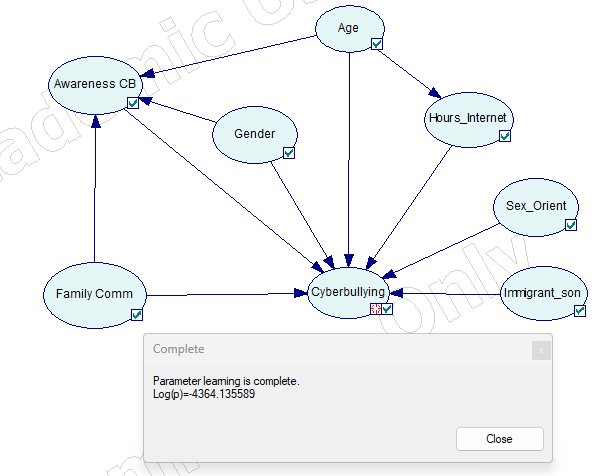

In [ ]:
# V1: Bayesian search algorithm (constrained and forced)
Dag_v1 = [
        ("Immigrant_son", "CB"),
        ("Sex_Orient", "CB"),
        ("Hours_Internet", "CB"),
        ("Age", "CB"),
        ("Gender", "Hours_Internet"),
        ("Gender", "CB"),
        ("Gender", "Family_Comm"),
        ("Gender", "Awareness_CB"),
        ("Awareness_CB", "CB"),
        ("Family_Comm", "CB")
    ]

CB_model = BayesianNetwork(Dag_v1)
# nx.draw(CB_model, with_labels=True, arrowsize=30, node_size=1000, alpha=0.7, font_weight="bold")
# plt.show()

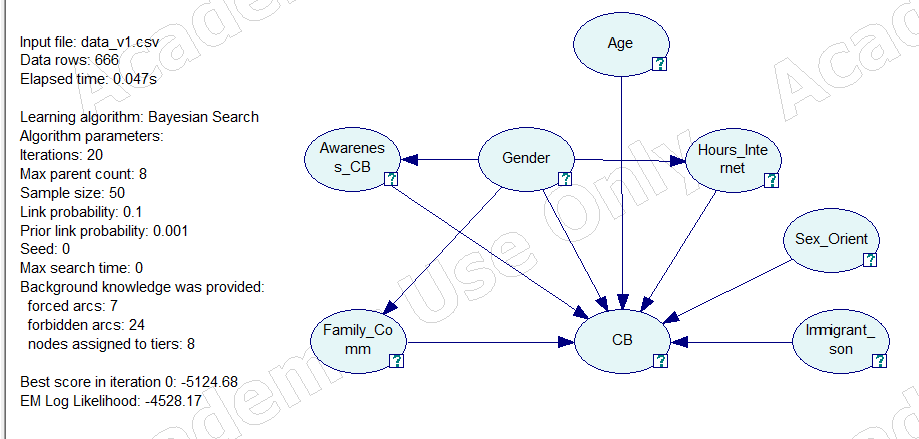

In [ ]:
# V2: PC algorithm (constrained and forced)
Dag_v2 = [
        ("Immigrant_son", "CB"),
        ("Sex_Orient", "CB"),
        ("Hours_Internet", "CB"),
        ("Age", "Hours_Internet"),
        ("Age", "CB"),
        ("Gender", "Hours_Internet"),
        ("Gender", "CB"),
        ("Gender", "Family_Comm"),
        ("Gender", "Awareness_CB"),
        ("Awareness_CB", "CB"),
        ("Family_Comm", "Awareness_CB"),
        ("Family_Comm", "CB")
    ]

CB_model = BayesianNetwork(Dag_v2)
# nx.draw(CB_model, with_labels=True, arrowsize=30, node_size=1000, alpha=0.7, font_weight="bold")
# plt.show()

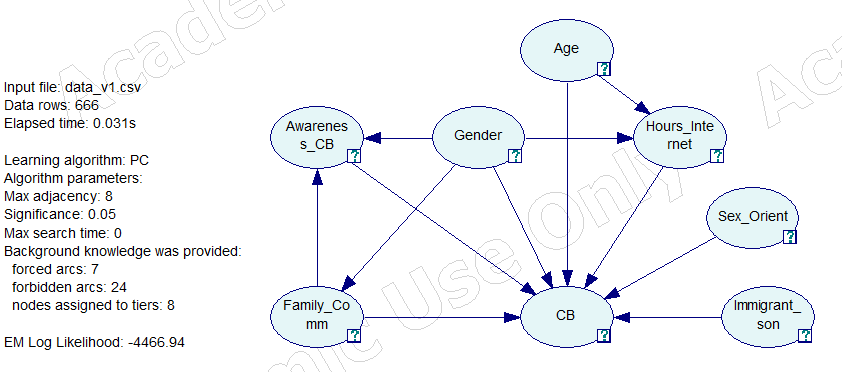

In [ ]:
# V3: Greedy Thick algorithm (constrained and forced)
Dag_v3 = [
        ("Immigrant_son", "CB"),
        ("Sex_Orient", "CB"),
        ("Hours_Internet", "CB"),
        ("Age", "CB"),
        ("Gender", "Hours_Internet"),
        ("Gender", "CB"),
        ("Gender", "Family_Comm"),
        ("Gender", "Awareness_CB"),
        ("Awareness_CB", "CB"),
        ("Family_Comm", "Awareness_CB"),
        ("Family_Comm", "CB")
    ]

CB_model = BayesianNetwork(Dag_v3)
# nx.draw(CB_model, with_labels=True, arrowsize=30, node_size=800, alpha=0.7, font_weight="bold")
# plt.show()

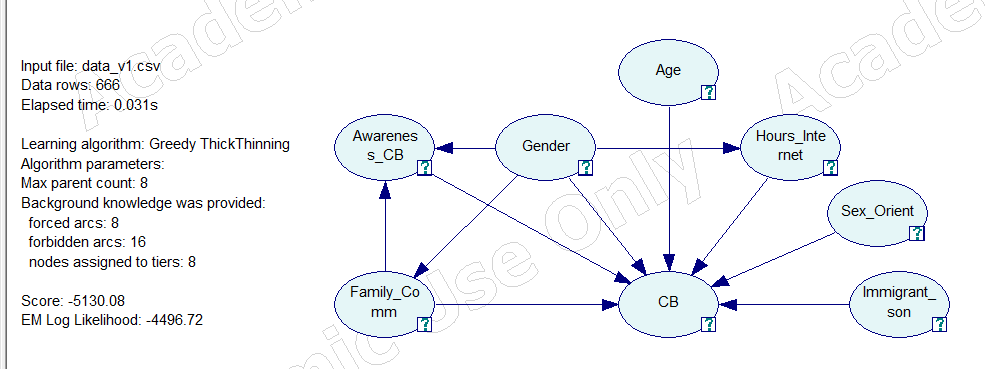

In [ ]:
# V4: All to CB
Dag_v4 = [
        ("Age", "CB"),
        ("Gender", "CB"),
        ("Sex_Orient", "CB"),
        ("Immigrant_son", "CB"),
        ("Hours_Internet", "CB"),
        ("Awareness_CB", "CB"),
        ("Family_Comm", "CB")
    ]

CB_model = BayesianNetwork(Dag_v4)
# nx.draw(CB_model, with_labels=True, arrowsize=30, node_size=800, alpha=0.7, font_weight="bold")
# plt.show()

In [ ]:
# V5: proposal D6.1 on steroids
Dag_v5 = [
        ("Immigrant_son", "CB"),
        ("Sex_Orient", "CB"),
        ("Hours_Internet", "CB"),
        ("Age", "Hours_Internet"),
        ("Age", "CB"),
        ("Age", "Awareness_CB"),
        ("Gender", "Hours_Internet"),
        ("Gender", "CB"),
        ("Gender", "Family_Comm"),
        ("Gender", "Awareness_CB"),
        ("Awareness_CB", "CB"),
        ("Family_Comm", "Awareness_CB"),
        ("Family_Comm", "CB")
    ]

CB_model = BayesianNetwork(Dag_v5)
# nx.draw(CB_model, with_labels=True, arrowsize=30, node_size=1000, alpha=0.7, font_weight="bold")
# plt.show()

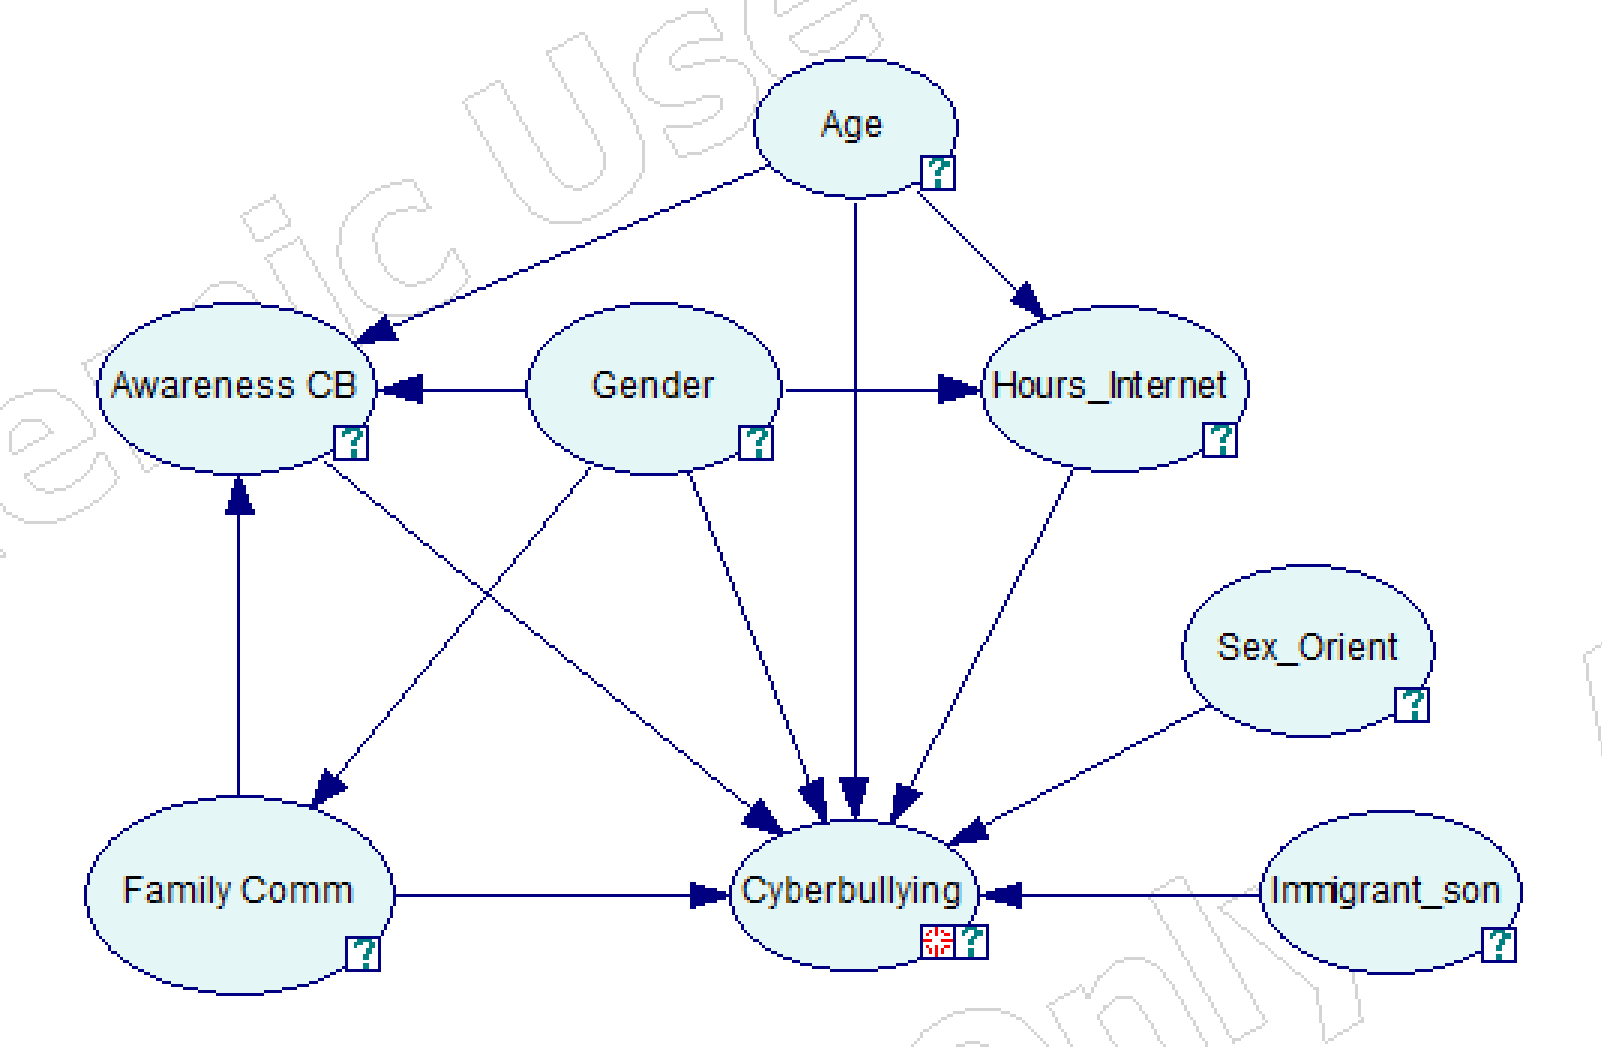

In [ ]:
# V6: proposal D6.1 on steroids + age-> family_comm
Dag_v6 = [
        ("Immigrant_son", "CB"),
        ("Sex_Orient", "CB"),
        ("Hours_Internet", "CB"),
        ("Age", "Hours_Internet"),
        ("Age", "CB"),
        ("Age", "Awareness_CB"),
        ("Age", "Family_Comm"),
        ("Gender", "Hours_Internet"),
        ("Gender", "CB"),
        ("Gender", "Family_Comm"),
        ("Gender", "Awareness_CB"),
        ("Awareness_CB", "CB"),
        ("Family_Comm", "Awareness_CB"),
        ("Family_Comm", "CB")
    ]

CB_model = BayesianNetwork(Dag_v6)
# nx.draw(CB_model, with_labels=True, arrowsize=30, node_size=1000, alpha=0.7, font_weight="bold")
# plt.show()

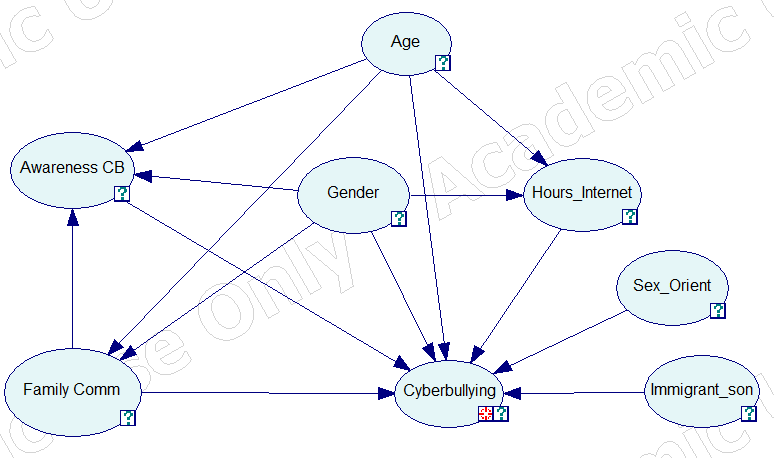

# Mixture between proposed and data

In [ ]:
fixed_dag = Dag_v1

In [ ]:
# Create a BDeuScore object and pass the data
score = BDeuScore(data_BN)

# Create a HillClimbSearch object with the data and scoring method
hc = HillClimbSearch(data_BN, fixed_deges = fixed_dag, scoring_method=score)

# Perform the HillClimbSearch algorithm to learn the structure
hc_BDeu_model = hc.estimate()

# Create a BayesianModel object from the best model
hc_BDeu_model = BayesianModel(hc_BDeu_model.edges())

# Learn parameters

In [ ]:
'''from pgmpy.estimators import ExhaustiveSearch

data_exhaustive = data_BN.drop(columns=['Immigrant_son', 'Sex_Orient'])
est = ExhaustiveSearch(data_exhaustive)
best_model = est.estimate()
print(best_model.edges())'''

In [ ]:
from pgmpy import estimators
from pgmpy.metrics import correlation_score
from pgmpy.metrics import log_likelihood_score
from pgmpy.metrics import structure_score

def print_scores(selected_structure, data_train, data_test):

  CB_model = BayesianNetwork(selected_structure)

  lst_scores = []
  # 2. Parameter learning from data
  # MaximumLikelihoodEstimator
  # BayesianEstimator   prior_type="BDeu", equivalent_sample_size=1000
  # ExpectationMaximization
  # IVEstimator   (Structural Equation)
  # SEMEstimator   (Structural Equation)

  CB_model.fit(data=data_train,
            estimator=estimators.BayesianEstimator,
            prior_type="BDeu", equivalent_sample_size=1000
  )
  # Correlation Score comparing statistics with d-separation (higher == better)
  #print(f'Correlation Scores:')
  score_ = correlation_score(CB_model, data_test, test="chi_square", significance_level=0.05)
  lst_scores.append(score_)
  #print(f'F1-Score [Chi Square test]     = {score_:.3f}')
  score_ = correlation_score(CB_model, data_test, test="g_sq", significance_level=0.05)
  #print(f'F1-Score [g_sq test]           = {score_:.3f}')
  score_ = correlation_score(CB_model, data_test, test="log_likelihood", significance_level=0.05)
  #print(f'F1-Score [log_likelihood test] = {score_:.3f}')
  score_ = correlation_score(CB_model, data_test, test="freeman_tuckey", significance_level=0.05)
  #print(f'F1-Score [freeman_tuckey test] = {score_:.3f}')
  score_ = correlation_score(CB_model, data_test, test="modified_log_likelihood", significance_level=0.05)
  lst_scores.append(score_)
  #print(f'F1-Score [modified_log_likelihood test] = {score_:.3f}')
  score_ = correlation_score(CB_model, data_test, test="cressie_read", significance_level=0.05)
  #print(f'F1-Score [cressie_read test]   = {score_:.3f}')

  # Log likelihood score  (higher == better)

  score_ = log_likelihood_score(CB_model, data_test)
  lst_scores.append(score_)
  #print(f'\nLog likelihood score = {score_:.3f}')

  # Structure score  (higher == better)

  #print(f'\nStructure Scores:')
  score_ = structure_score(CB_model, data_test, scoring_method="k2")
  lst_scores.append(score_)
  #print(f'k2 score   = {score_:.3f}')
  score_ = structure_score(CB_model, data_test, scoring_method="bdeu")
  lst_scores.append(score_)
  #print(f'bdeu score = {score_:.3f}')
  score_ = structure_score(CB_model, data_test, scoring_method="bds")
  lst_scores.append(score_)
  #print(f'bds score  = {score_:.3f}')
  score_ = structure_score(CB_model, data_test, scoring_method="bic")
  lst_scores.append(score_)
  #print(f'bic score  = {score_:.3f}')

  return lst_scores

In [ ]:
scores_train_v0 = print_scores(Dag_v0, data_BN, data_BN)
scores_train_v1 = print_scores(Dag_v1, data_BN, data_BN)
scores_train_v2 = print_scores(Dag_v2, data_BN, data_BN)
scores_train_v3 = print_scores(Dag_v3, data_BN, data_BN)
scores_train_v4 = print_scores(Dag_v4, data_BN, data_BN)
scores_train_v5 = print_scores(Dag_v5, data_BN, data_BN)
scores_train_v6 = print_scores(Dag_v6, data_BN, data_BN)

In [ ]:
lst_name_scores = ['F1_score_Chi_Square', 'F1_score_Modified_log_likelihood', 'Log_likelihood', 'Structure_K2', 'Structure_bdeu', 'Structure_bds', 'Structure_bic']

In [ ]:
print('TRAIN w/ ALL')
dict_data ={'DAG_v0': scores_train_v0, 'DAG_v1': scores_train_v1, 'DAG_v2': scores_train_v2,
            'DAG_v3': scores_train_v3, 'DAG_v4': scores_train_v4, 'DAG_v5': scores_train_v5, 'DAG_v6': scores_train_v6}
df_scores = pd.DataFrame(dict_data, index =lst_name_scores)
df_scores.style.highlight_max(color = 'lightgreen', axis = 1)

### Train-Test split (85%-15%)

In [ ]:
train_df = data_BN.sample(frac = 0.85)
test_df = data_BN.drop(train_df.index)
print(f'len train: {len(train_df)}')
print(f'len test: {len(test_df)}')

In [ ]:
scores_train_v0 = print_scores(Dag_v0, train_df, train_df)
scores_train_v1 = print_scores(Dag_v1, train_df, train_df)
scores_train_v2 = print_scores(Dag_v2, train_df, train_df)
scores_train_v3 = print_scores(Dag_v3, train_df, train_df)
scores_train_v4 = print_scores(Dag_v4, train_df, train_df)
scores_train_v5 = print_scores(Dag_v5, train_df, train_df)
scores_train_v6 = print_scores(Dag_v6, train_df, train_df)

In [ ]:
print('TRAIN (85%)')
dict_data ={'DAG_v0': scores_train_v0, 'DAG_v1': scores_train_v1, 'DAG_v2': scores_train_v2,
            'DAG_v3': scores_train_v3, 'DAG_v4': scores_train_v4, 'DAG_v5': scores_train_v5, 'DAG_v6': scores_train_v6}
df_scores = pd.DataFrame(dict_data, index =lst_name_scores)
df_scores.style.highlight_max(color = 'lightgreen', axis = 1)

In [ ]:
scores_test_v0 = print_scores(Dag_v0, train_df, test_df)
scores_test_v1 = print_scores(Dag_v1, train_df, test_df)
scores_test_v2 = print_scores(Dag_v2, train_df, test_df)
scores_test_v3 = print_scores(Dag_v3, train_df, test_df)
scores_test_v4 = print_scores(Dag_v4, train_df, test_df)
scores_test_v5 = print_scores(Dag_v5, train_df, test_df)
scores_test_v6 = print_scores(Dag_v6, train_df, test_df)

In [ ]:
print('TEST (15%)')
dict_data_test ={'DAG_v0': scores_test_v0, 'DAG_v1': scores_test_v1, 'DAG_v2': scores_test_v2,
                 'DAG_v3': scores_test_v3, 'DAG_v4': scores_test_v4, 'DAG_v5': scores_test_v5, 'DAG_v6': scores_test_v6}
df_scores_test = pd.DataFrame(dict_data_test, index =lst_name_scores)
df_scores_test.style.highlight_max(color = 'lightgreen', axis = 1)

### Train-Test split (stratified k-fold)

In [ ]:
X_df = data_BN.drop(columns=['CB'])
y_df = data_BN['CB']

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=15, shuffle=True)
skf.get_n_splits(X_df, y_df)

In [ ]:
scores_train_v0 = []
scores_train_v1 = []
scores_train_v2 = []
scores_train_v3 = []
scores_train_v4 = []
scores_train_v5 = []
scores_train_v6 = []
scores_test_v0 = []
scores_test_v1 = []
scores_test_v2 = []
scores_test_v3 = []
scores_test_v4 = []
scores_test_v5 = []
scores_test_v6 = []

for train_index, test_index in skf.split(X_df, y_df):
  X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
  y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
  X_train.insert(len(X_train.columns), 'CB', y_train)
  X_test.insert(len(X_test.columns), 'CB', y_test)

  scores_train_v0.append(print_scores(Dag_v0, X_train, X_train))
  scores_train_v1.append(print_scores(Dag_v1, X_train, X_train))
  scores_train_v2.append(print_scores(Dag_v2, X_train, X_train))
  scores_train_v3.append(print_scores(Dag_v3, X_train, X_train))
  scores_train_v4.append(print_scores(Dag_v4, X_train, X_train))
  scores_train_v5.append(print_scores(Dag_v5, X_train, X_train))
  scores_train_v6.append(print_scores(Dag_v6, X_train, X_train))

  scores_test_v0.append(print_scores(Dag_v0, X_train, X_test))
  scores_test_v1.append(print_scores(Dag_v1, X_train, X_test))
  scores_test_v2.append(print_scores(Dag_v2, X_train, X_test))
  scores_test_v3.append(print_scores(Dag_v3, X_train, X_test))
  scores_test_v4.append(print_scores(Dag_v4, X_train, X_test))
  scores_test_v5.append(print_scores(Dag_v5, X_train, X_test))
  scores_test_v6.append(print_scores(Dag_v6, X_train, X_test))


In [ ]:
scores_train_v0

In [ ]:
mean_scores_train_v0 = np.mean(scores_train_v0, axis=0)
mean_scores_train_v1 = np.mean(scores_train_v1, axis=0)
mean_scores_train_v2 = np.mean(scores_train_v2, axis=0)
mean_scores_train_v3 = np.mean(scores_train_v3, axis=0)
mean_scores_train_v4 = np.mean(scores_train_v4, axis=0)
mean_scores_train_v5 = np.mean(scores_train_v5, axis=0)
mean_scores_train_v6 = np.mean(scores_train_v6, axis=0)

In [ ]:
sd_scores_train_v0 = np.std(scores_train_v0, axis=0)
sd_scores_train_v1 = np.std(scores_train_v1, axis=0)
sd_scores_train_v2 = np.std(scores_train_v2, axis=0)
sd_scores_train_v3 = np.std(scores_train_v3, axis=0)
sd_scores_train_v4 = np.std(scores_train_v4, axis=0)
sd_scores_train_v5 = np.std(scores_train_v5, axis=0)
sd_scores_train_v6 = np.std(scores_train_v6, axis=0)

In [ ]:
min_scores_train_v0 = np.min(scores_train_v0, axis=0)
min_scores_train_v1 = np.min(scores_train_v1, axis=0)
min_scores_train_v2 = np.min(scores_train_v2, axis=0)
min_scores_train_v3 = np.min(scores_train_v3, axis=0)
min_scores_train_v4 = np.min(scores_train_v4, axis=0)
min_scores_train_v5 = np.min(scores_train_v5, axis=0)
min_scores_train_v6 = np.min(scores_train_v6, axis=0)

In [ ]:
df = pd.DataFrame(columns=['Model', 'Metric', 'Sample', 'Value'])

# Loop through each model and its metrics
for i, model in enumerate([scores_train_v0, scores_train_v1, scores_train_v2,
                           scores_train_v3, scores_train_v4, scores_train_v5, scores_train_v6]):
    for j, metrics in enumerate(model):
        for k, metric_value in enumerate(metrics):
            # Append a new row to the DataFrame
            df = df.append({'Model': f"Model{i+1}", 'Metric': f"M{k+1}", 'Sample': f"S{j+1}", 'Value': metric_value},
                           ignore_index=True)

# Print the resulting DataFrame
print(df)

In [ ]:
aggregations = {
    'Mean': ('Value', 'mean'),
    'SD': ('Value', 'std'),
    'Min': ('Value', 'min'),
    'Max': ('Value', 'max'),
    'Median': ('Value', 'median'),
    'Q1': ('Value', lambda x: x.quantile(0.25)),
    'Q3': ('Value', lambda x: x.quantile(0.75))
}

# Perform the aggregation by grouping the DataFrame by 'Model' and 'Metric'
result = df.groupby(['Model', 'Metric']).agg(**aggregations).reset_index()

# Print the resulting table
print(result)

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 6))

data = result[]
# Plot the lollipop chart
plt.stem(data['Model'], data['Mean'], markerfmt='o', basefmt=" ")
plt.errorbar(data['Model'], data['Mean'], yerr=data['SD'], linestyle='None', color='black')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Mean')
plt.title('Mean and Standard Deviation for Metric M2')

# Show the plot
plt.show()

In [ ]:
print('TRAIN (min stratified k-fold)')
dict_data ={'DAG_v0': min_scores_train_v0, 'DAG_v1': min_scores_train_v1, 'DAG_v2': min_scores_train_v2,
            'DAG_v3': min_scores_train_v3, 'DAG_v4': min_scores_train_v4, 'DAG_v5': min_scores_train_v5, 'DAG_v6': min_scores_train_v6}
df_scores = pd.DataFrame(dict_data, index =lst_name_scores)
df_scores.style.highlight_max(color = 'lightgreen', axis = 1)

In [ ]:
print('TRAIN (sd stratified k-fold)')
dict_data ={'DAG_v0': sd_scores_train_v0, 'DAG_v1': sd_scores_train_v1, 'DAG_v2': sd_scores_train_v2,
            'DAG_v3': sd_scores_train_v3, 'DAG_v4': sd_scores_train_v4, 'DAG_v5': sd_scores_train_v5, 'DAG_v6': sd_scores_train_v6}
df_scores = pd.DataFrame(dict_data, index =lst_name_scores)
df_scores.style.highlight_max(color = 'lightgreen', axis = 1)

In [ ]:
print('TRAIN (mean stratified k-fold)')
dict_data ={'DAG_v0': mean_scores_train_v0, 'DAG_v1': mean_scores_train_v1, 'DAG_v2': mean_scores_train_v2,
            'DAG_v3': mean_scores_train_v3, 'DAG_v4': mean_scores_train_v4, 'DAG_v5': mean_scores_train_v5, 'DAG_v6': mean_scores_train_v6}
df_scores = pd.DataFrame(dict_data, index =lst_name_scores)
df_scores.style.highlight_max(color = 'lightgreen', axis = 1)

In [ ]:
mean_scores_test_v0 = np.mean(scores_test_v0, axis=0)
mean_scores_test_v1 = np.mean(scores_test_v1, axis=0)
mean_scores_test_v2 = np.mean(scores_test_v2, axis=0)
mean_scores_test_v3 = np.mean(scores_test_v3, axis=0)
mean_scores_test_v4 = np.mean(scores_test_v4, axis=0)
mean_scores_test_v5 = np.mean(scores_test_v5, axis=0)
mean_scores_test_v6 = np.mean(scores_test_v6, axis=0)

In [ ]:
print('TEST (mean stratified k-fold)')
dict_data_test ={'DAG_v0': mean_scores_test_v0, 'DAG_v1': mean_scores_test_v1, 'DAG_v2': mean_scores_test_v2,
                 'DAG_v3': mean_scores_test_v3, 'DAG_v4': mean_scores_test_v4, 'DAG_v5': mean_scores_test_v5, 'DAG_v6': mean_scores_test_v6}
df_scores_test = pd.DataFrame(dict_data_test, index =lst_name_scores)
df_scores_test.style.highlight_max(color = 'lightgreen', axis = 1)

TEST (mean stratified k-fold)


,DAG_v0,DAG_v1,DAG_v2,DAG_v3,DAG_v4,DAG_v5,DAG_v6
F1_score_Chi_Square,0.686572,0.673035,0.647953,0.673035,0.744989,0.610365,0.570626
F1_score_Modified_log_likelihood,0.351718,0.367141,0.383984,0.367141,0.290704,0.402453,0.422798
Log_likelihood,-1070.455464,-1072.438100,-1063.854087,-1066.023663,-1088.561557,-1062.025853,-1060.063722
Structure_K2,-1021.505442,-996.438043,-1009.554988,-1004.569151,-998.561428,-1022.947901,-1028.761201
Structure_bdeu,-1101.956273,-1024.649188,-1057.506039,-1041.922651,-1026.370367,-1112.818538,-1130.237661
Structure_bds,-12585.880403,-12450.777065,-12498.942521,-12474.499002,-12450.418802,-12606.295947,-12632.575202
Structure_bic,-13205.447657,-12689.433753,-12835.441395,-12763.244243,-12663.357342,-13275.020866,-13348.790480


## Adversarial Validation

In [ ]:
from pgmpy import estimators
from pgmpy import sampling

def generate_data(DAG, n_size):
  adv_model = BayesianNetwork(DAG)

  # MaximumLikelihoodEstimator
  # BayesianEstimator
  # ExpectationMaximization
  # IVEstimator   (Structural Equation)
  # SEMEstimator   (Structural Equation)

  # adv_model.fit(data=data_BN,
  #           estimator=estimators.BayesianEstimator,
  #           prior_type="BDeu",
  #           equivalent_sample_size=666
  # )
  adv_model.fit(data=data_BN,
            estimator=estimators.MaximumLikelihoodEstimator
  )

  # ApproxInference   https://pgmpy.org/approx_infer/approx_infer.html
  # BayesianModelSampling   https://pgmpy.org/approx_infer/bn_sampling.html
  # GibbsSampling   https://pgmpy.org/approx_infer/gibbs.html
  sampler = sampling.BayesianModelSampling(adv_model)

  return sampler.rejection_sample(size=n_size, show_progress=False)

In [ ]:
data_adversarial = data_BN.drop(columns=['CB'])
#data_adversarial = data_BN.copy()
data_adversarial['Synthetic'] = np.zeros(len(data_adversarial))
data_adversarial

,Age,Gender,Sex_Orient,Hours_Internet,Awareness_CB,Family_Comm,Immigrant_son,Synthetic
2,2,0,0,1,4,1,0,0.0
3,3,1,0,2,3,3,1,0.0
5,2,0,0,3,4,3,0,0.0
6,2,1,0,2,3,2,0,0.0
7,2,1,0,3,4,2,1,0.0
...,...,...,...,...,...,...,...,...
834,0,1,0,2,3,0,0,0.0
835,1,0,0,1,4,0,0,0.0
836,1,0,0,1,3,3,0,0.0
837,1,0,0,3,4,3,0,0.0


In [ ]:
len_data = len(data_adversarial)
data_adv_v0 = generate_data(Dag_v0, len_data)
data_adv_v0['Synthetic'] = np.ones(len_data)
data_adv_v0.drop(columns=['CB'], inplace=True)

data_adv_v1 = generate_data(Dag_v1, len_data)
data_adv_v1['Synthetic'] = np.ones(len_data)
data_adv_v1.drop(columns=['CB'], inplace=True)

data_adv_v2 = generate_data(Dag_v2, len_data)
data_adv_v2['Synthetic'] = np.ones(len_data)
data_adv_v2.drop(columns=['CB'], inplace=True)

data_adv_v3 = generate_data(Dag_v3, len_data)
data_adv_v3['Synthetic'] = np.ones(len_data)
data_adv_v3.drop(columns=['CB'], inplace=True)

data_adv_v4 = generate_data(Dag_v4, len_data)
data_adv_v4['Synthetic'] = np.ones(len_data)
data_adv_v4.drop(columns=['CB'], inplace=True)

data_adv_v5 = generate_data(Dag_v5, len_data)
data_adv_v5['Synthetic'] = np.ones(len_data)
data_adv_v5.drop(columns=['CB'], inplace=True)

data_adv_v6 = generate_data(Dag_v6, len_data)
data_adv_v6['Synthetic'] = np.ones(len_data)
data_adv_v6.drop(columns=['CB'], inplace=True)

  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pgmpy/utils/mathext.py:82: UserWarning:

Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.



  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pgmpy/utils/mathext.py:82: UserWarning:

Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.



  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pgmpy/utils/mathext.py:82: UserWarning:

Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.



  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pgmpy/utils/mathext.py:82: UserWarning:

Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.



  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pgmpy/utils/mathext.py:82: UserWarning:

Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.



  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pgmpy/utils/mathext.py:82: UserWarning:

Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.



  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pgmpy/utils/mathext.py:82: UserWarning:

Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.



In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import cv
from sklearn import metrics

In [ ]:
def plot_roc(y_trues, y_preds, labels, x_max=1.0):
    fig, ax = plt.subplots()
    for i, y_pred in enumerate(y_preds):
        y_true = y_trues[i]
        fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
        auc = metrics.roc_auc_score(y_true, y_pred)
        ax.plot(fpr, tpr, label='%s; AUC=%.3f' % (labels[i], auc), marker='o', markersize=1)

    ax.legend()
    ax.grid()
    ax.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linestyle='--')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_xlim([-0.01, x_max])
    _ = ax.set_ylabel('True Positive Rate')

In [ ]:
def adv_validation(data_real, data_synth):
  all_data = pd.concat([data_real, data_synth], axis=0, ignore_index=True)
  all_data_shuffled = all_data.sample(frac=1).reset_index(drop=True)

  X = X = all_data_shuffled.drop(['Synthetic'], axis=1)
  y = all_data_shuffled['Synthetic']
  XGBdata = xgb.DMatrix(data=X,label=y)

  params = {"objective":"binary:logistic",
          "eval_metric":"logloss",
          'learning_rate': 0.05,
          'max_depth': 5, }
  cross_val_results = cv(dtrain=XGBdata, params=params,
                       nfold=5, metrics="auc",
                       num_boost_round=200,early_stopping_rounds=20,
                       as_pandas=True)
  print((cross_val_results["test-auc-mean"]).tail(1))

  classifier = XGBClassifier(eval_metric='logloss',use_label_encoder=False)
  classifier.fit(X, y)
  fig, ax = plt.subplots(figsize=(12,4))
  plot_importance(classifier, ax=ax)
  plt.show();

47    0.505768
Name: test-auc-mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



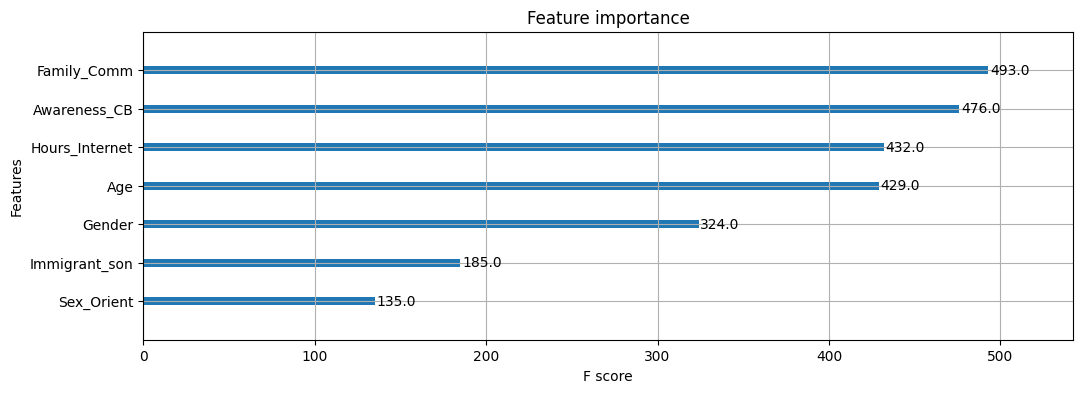

In [ ]:
adv_validation(data_adversarial, data_adv_v0)

6    0.527584
Name: test-auc-mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



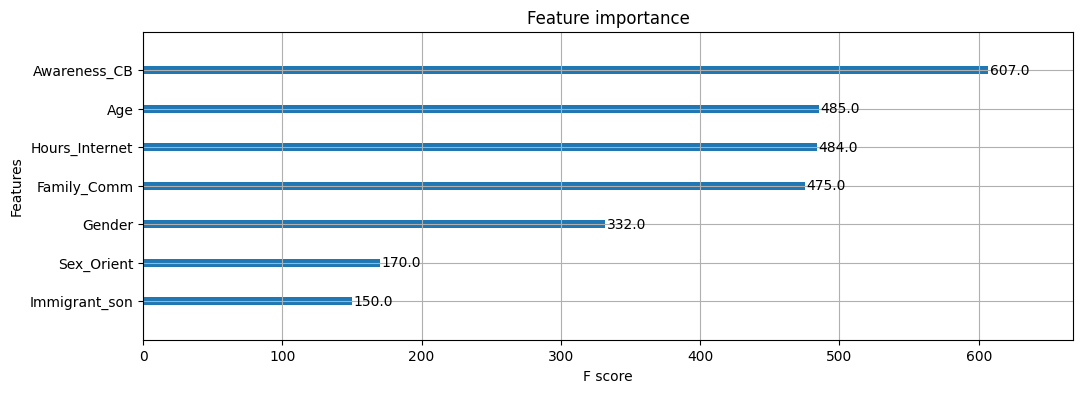

In [ ]:
adv_validation(data_adversarial, data_adv_v1)

7    0.530124
Name: test-auc-mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



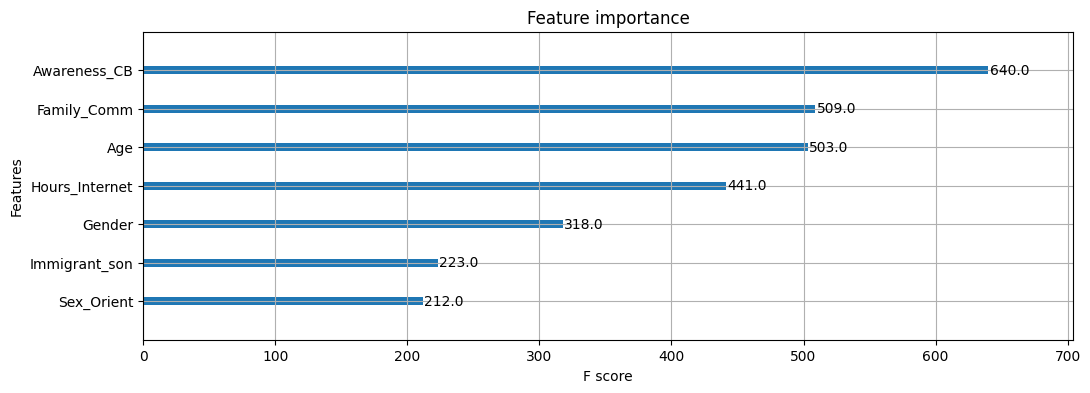

In [ ]:
adv_validation(data_adversarial, data_adv_v2)

2    0.538516
Name: test-auc-mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



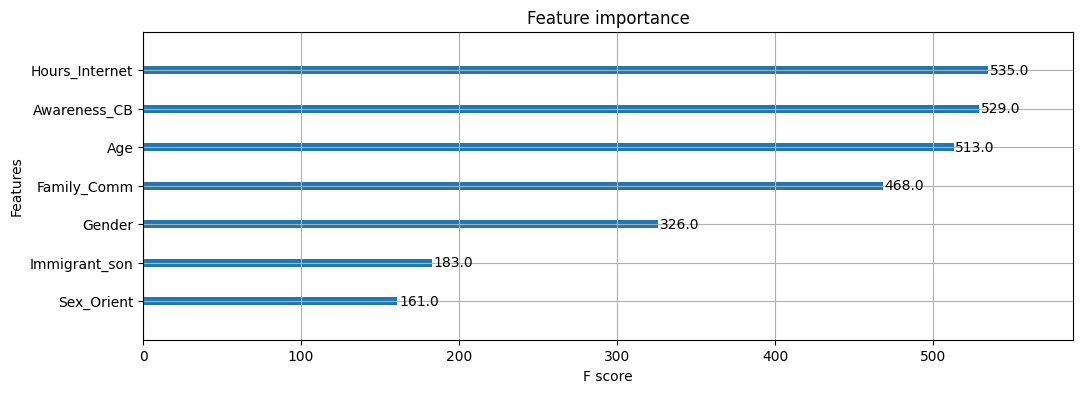

In [ ]:
adv_validation(data_adversarial, data_adv_v3)

17    0.60357
Name: test-auc-mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



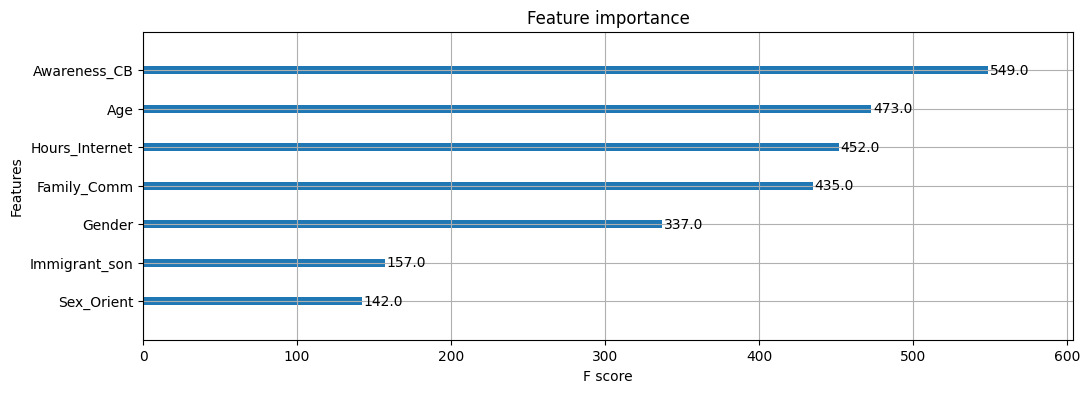

In [ ]:
adv_validation(data_adversarial, data_adv_v4)

0    0.503874
Name: test-auc-mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



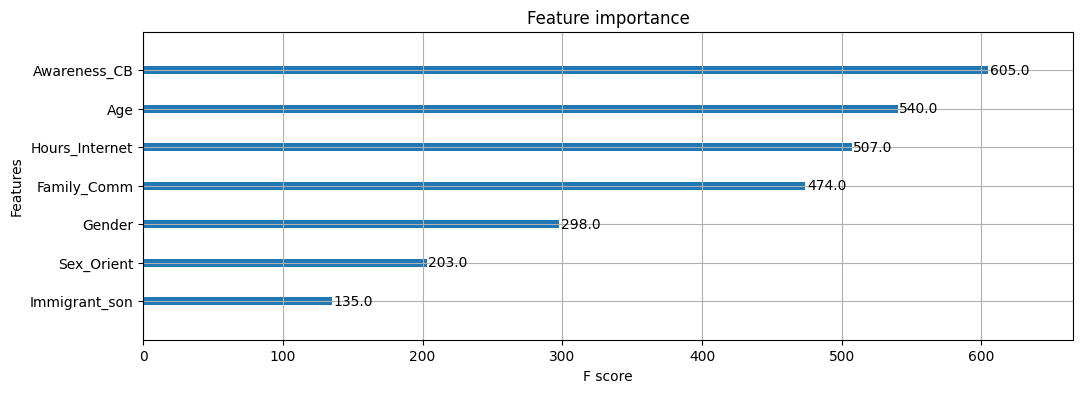

In [ ]:
adv_validation(data_adversarial, data_adv_v5)

0    0.483784
Name: test-auc-mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



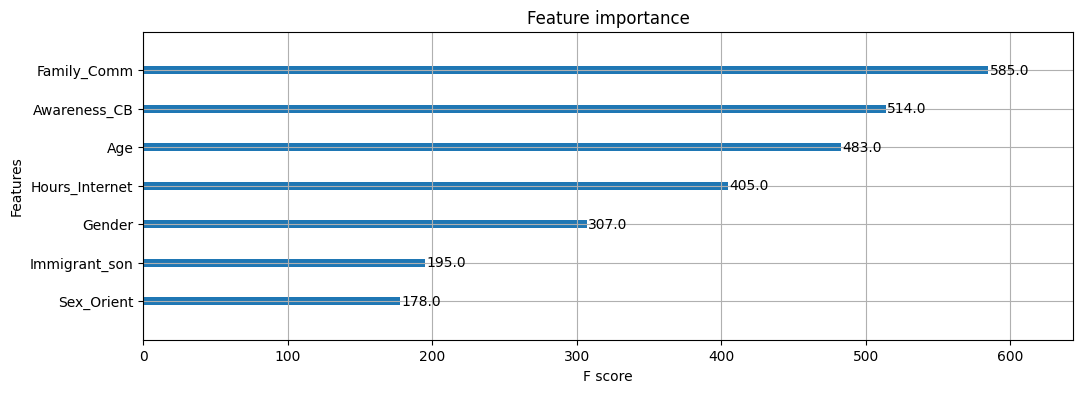

In [ ]:
adv_validation(data_adversarial, data_adv_v6)

### Does the Estonian data come from a different distribution?

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1_WVwMPSCncGDSGLO0Iiz1h6xj-E6cxT3',
                                    dest_path='./survey_data_estonia.zip',
                                    unzip=False)

In [ ]:
!unzip survey_data_estonia.zip

Archive:  survey_data_estonia.zip
  inflating: data_estonia_v1.csv     


In [ ]:
data_BN_estonia_ = pd.read_csv('data_estonia_v1.csv')
data_BN_estonia = data_BN_estonia_.astype('int32')
data_BN_estonia.drop(columns=['CB_level'], inplace=True)
data_BN_estonia['Synthetic'] = np.ones(len(data_BN_estonia))
data_BN_estonia

,Age,Gender,Sex_Orient,Hours_Internet,Awareness_CB,Family_Comm,Immigrant_son,CB,Synthetic
0,1,1,0,2,3,2,0,0,1.0
1,1,1,1,1,4,1,0,1,1.0
2,1,0,0,1,2,1,0,0,1.0
3,2,1,1,1,4,2,0,0,1.0
4,1,1,0,3,0,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...
290,1,2,1,3,1,3,0,0,1.0
291,1,1,1,1,3,3,0,0,1.0
292,2,0,1,2,2,1,0,0,1.0
293,2,1,0,3,4,2,0,0,1.0


0    1.0
Name: test-auc-mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



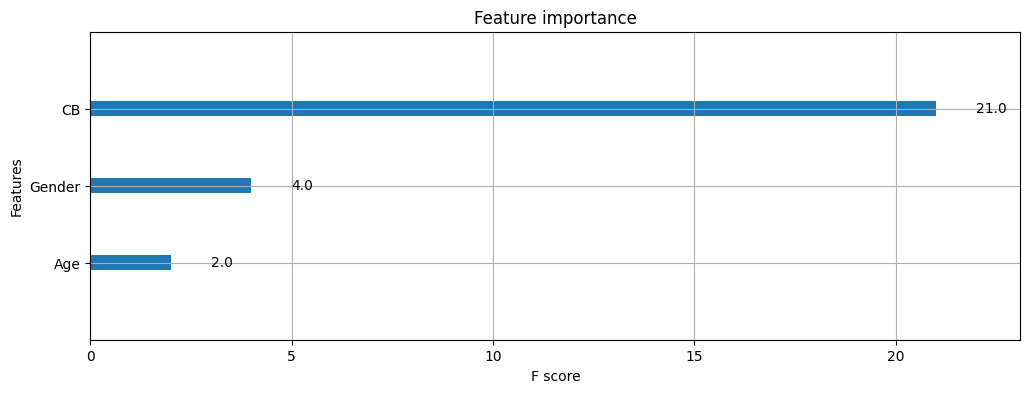

In [ ]:
adv_validation(data_adversarial, data_BN_estonia)

## [experiments] Logistic regression model

#### Input (Hours_Internet)

In [ ]:
from sklearn.linear_model import LogisticRegression
X = data_1[['Hours_Internet']]
y = data_1['CB']
clf = LogisticRegression(penalty='none', fit_intercept=False).fit(X, y)

print(f'Accuracy: {clf.score(X, y):.2f}')
print(f'Coefficient Hours_Internet: {clf.coef_[0]}')

Accuracy: 0.86
Coefficient Hours_Internet: [-0.83606437]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.



In [ ]:
from statsmodels.discrete.discrete_model import Logit
logit_model=Logit(y, X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.474763
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                     CB   No. Observations:                  666
Model:                          Logit   Df Residuals:                      665
Method:                           MLE   Df Model:                            0
Date:                Wed, 17 May 2023   Pseudo R-squ.:                 -0.1988
Time:                        18:05:06   Log-Likelihood:                -316.19
converged:                       True   LL-Null:                       -263.76
Covariance Type:            nonrobust   LLR p-value:                       nan
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Hours_Internet    -0.8361      0.060    -13.834      0.000      -0.955      -0.718


In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data_1['Hours_Internet'], data_1['CB_level'])
results = chi2_contingency(contingency_table)
print(f'Chi_Square test statistic: {results[0]:.3f}')
print(f'p-value: {results[1]:.4f}')
print(f'Degrees of freedom: {results[2]}')
print(f'The expected frequencies, based on the marginal sums of the table:\n {results[3]}')

Chi_Square test statistic: 26.374
p-value: 0.0018
Degrees of freedom: 9
The expected frequencies, based on the marginal sums of the table:
 [[ 20.21621622   9.18918919   3.52252252   1.07207207]
 [142.10810811  64.59459459  24.76126126   7.53603604]
 [144.48648649  65.67567568  25.17567568   7.66216216]
 [ 89.18918919  40.54054054  15.54054054   4.72972973]]


#### Input (Hours_Internet + Age)

In [ ]:
from sklearn.linear_model import LogisticRegression
X = data_1[['Age','Hours_Internet']]
y = data_1['CB']
clf = LogisticRegression(penalty='none', fit_intercept=False).fit(X, y)

print(f'Accuracy: {clf.score(X, y):.2f}')
print(f'Coefficient Age: {clf.coef_[0][0]:.3f}')
print(f'Coefficient Hours_Internet: {clf.coef_[0][1]:.3f}')

Accuracy: 0.86
Coefficient Age: -0.810
Coefficient Hours_Internet: -0.272


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.



In [ ]:
from statsmodels.discrete.discrete_model import Logit
logit_model=Logit(y, X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.431134
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                     CB   No. Observations:                  666
Model:                          Logit   Df Residuals:                      664
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 May 2023   Pseudo R-squ.:                -0.08863
Time:                        18:05:06   Log-Likelihood:                -287.14
converged:                       True   LL-Null:                       -263.76
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Age               -0.8103      0.119     -6.824      0.000      -1.043      -0.578
Hours_Internet   

## Backlog

In [ ]:
'''# V5: Hill Climb Search algorithm

from pgmpy.estimators import HillClimbSearch, BicScore

est = HillClimbSearch(data_BN)

best_model = est.estimate(scoring_method=BicScore(data_BN),
                          black_list=[("Sex_Orient", "Immigrant_son"),       # Not arrows to Immigrant_son
                                      ("Hours_Internet", "Immigrant_son"),
                                      ("Age", "Immigrant_son"),
                                      ("Gender", "Immigrant_son"),
                                      ("Awareness_CB", "Immigrant_son"),
                                      ("Family_Comm", "Immigrant_son"),
                                      ("CB", "Immigrant_son"),
                                      ("Immigrant_son", "Sex_Orient"),       # Not arrows to Sex_Orient
                                      ("Hours_Internet", "Sex_Orient"),
                                      ("Age", "Sex_Orient"),
                                      ("Gender", "Sex_Orient"),
                                      ("Awareness_CB", "Sex_Orient"),
                                      ("Family_Comm", "Sex_Orient"),
                                      ("CB", "Sex_Orient"),
                                      ("Immigrant_son", "Age"),              # Not arrows to Age
                                      ("Sex_Orient", "Age"),
                                      ("Hours_Internet", "Age"),
                                      ("Gender", "Age"),
                                      ("Awareness_CB", "Age"),
                                      ("Family_Comm", "Age"),
                                      ("CB", "Age"),
                                      ("Immigrant_son", "Gender"),              # Not arrows to Gender
                                      ("Sex_Orient", "Gender"),
                                      ("Hours_Internet", "Gender"),
                                      ("Age", "Gender"),
                                      ("Awareness_CB", "Gender"),
                                      ("Family_Comm", "Gender"),
                                      ("CB", "Gender"),
                                      ("CB", "Hours_Internet"),              # Not arrows FROM CB
                                      ("CB", "Awareness_CB"),
                                      ("CB", "Family_Comm")
                                      ])
print(best_model.edges())'''

'# V5: Hill Climb Search algorithm\n\nfrom pgmpy.estimators import HillClimbSearch, BicScore\n\nest = HillClimbSearch(data_BN)\n\nbest_model = est.estimate(scoring_method=BicScore(data_BN),\n                          black_list=[("Sex_Orient", "Immigrant_son"),       # Not arrows to Immigrant_son\n                                      ("Hours_Internet", "Immigrant_son"),\n                                      ("Age", "Immigrant_son"),\n                                      ("Gender", "Immigrant_son"),\n                                      ("Awareness_CB", "Immigrant_son"),\n                                      ("Family_Comm", "Immigrant_son"),\n                                      ("CB", "Immigrant_son"),\n                                      ("Immigrant_son", "Sex_Orient"),       # Not arrows to Sex_Orient\n                                      ("Hours_Internet", "Sex_Orient"),\n                                      ("Age", "Sex_Orient"),\n                                      ("G